# Frequency response and digital filters

Welcome to the third notebook of the course "Digital Signal Processing" for under-graduate students. This notebook provides some tools to design digital filters and to filter a noisy signal. We will need the Scipy library introduced in the first notebook.

In [12]:
# Importing libraries

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt


## Frequency response

The frequency repsonse of any system (digital or analog) provides graphic information about how changes in the frequency of the input signal, produces changes in the amplitude or phase of the output signal.

For digital systems modeled by a transfer function in the *z*-domain, the same change of variable as in the Discrete-Time Fourier transform is applied, i.e. $z=e^{j\omega}$, where $\omega$ is the digital frequency measured in radians. Thus, given the following $N$-th order system:

$H(z)=\frac{b_Mz^{-M}+⋯+b_1z^{-1}+b_0}{a_Nz^{-N}+⋯+a_1z^{-1}+a_0}→H(\omega)=\frac{b_Me^{-j\omega M}+⋯+b_1z^{-j\omega}+b_0}{a_Nz^{-j\omega N}+⋯+a_1z^{-j\omega}+a_0}$

Since $H(\omega)\in\mathbb{C}$, it can be expressed as follows:


$H(\omega)=|H(\omega)|e^{\angle H(\omega)}$


The plot of $|H(\omega)|$ is called *Frequency response of magnitude*, whilst the plot $\angle H(\omega)$ of is called *Frequency response of phase*.

Likewise the topic saw in the topic *Spectra*, in order to increase the interpretability of results, it is convenient to plot in function of the frequency in Hertz, using the following conversion:

$\omega=2\pi \frac{f}{F_s}$

***Example - comb filter***

A comb filter sums a signal with its delayed versions, causing constructive and destructive interference. The transfer function of a $N$-th order comb filter is:

$H(z)=1-\alpha z^{-N}$

Plot the frequency response for $\alpha=0.5, 0.75$ and $1$, and a arbitrary order provide by the user.

In order to use the *freqz* function, the numerator and denominator must be found. Thus, we can express the transfer function as follows:



$H(z)=\frac{z^N-\alpha}{z^N}=\frac{z^N+0\times z^{N-1}+\cdots +0\times z^{-1}-\alpha}{z^N+0\times z^{N-1}+\cdots +0\times z^{-1}+0}$

Thus, we can use the following code:

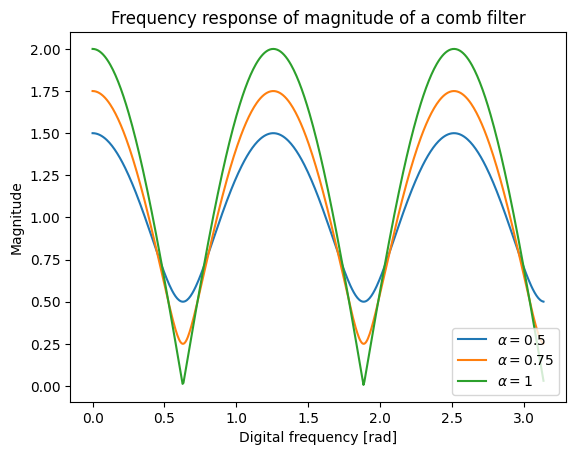

In [13]:
# insert() function: It adds elements at the given index in an array
# append() function: It adds the elements to the end of the array

N = int(input('Enter the order of the comb filter: '))

alphas = np.array([0.5, 0.75, 1])

a = np.insert(np.array(np.zeros(N)), 0, 1) # a = [1 0 ... 0]

for alpha in alphas:
  b = np.append(np.insert(np.array(np.zeros(N-1)), 0, 1),alpha) # b = [1 0 ... 0 alpha]
  w, H = signal.freqz(b, a)
  plt.plot(w, np.abs(H))

plt.xlabel('Digital frequency [rad]')
plt.ylabel('Magnitude')
plt.title('Frequency response of magnitude of a comb filter')
plt.legend([r'$\alpha=0.5$',r'$\alpha=0.75$',r'$\alpha=1$'])
plt.show()

What about the frequency response of phase?

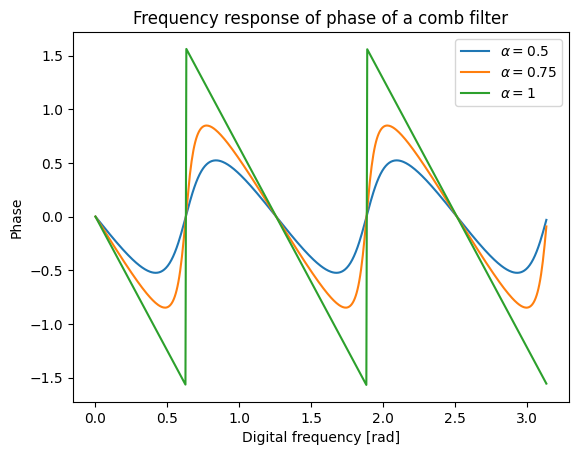

In [14]:
for alpha in alphas:
  b = np.append(np.insert(np.array(np.zeros(N-1)), 0, 1),alpha) # b = [1 0 ... 0 alpha]
  w, H = signal.freqz(b, a)
  plt.plot(w, np.unwrap(np.angle(H)))

plt.xlabel('Digital frequency [rad]')
plt.ylabel('Phase')
plt.title('Frequency response of phase of a comb filter')
plt.legend([r'$\alpha=0.5$',r'$\alpha=0.75$',r'$\alpha=1$'])
plt.show()

##Bode plots

Bode plots are frequency responses but in semilogarithmic scale, and the magnitude is shown in decibeles (dB). It is useful to plot wider frequency ranges.

In Matplotlib, instead of ```plot```, you can use ```semilogx``` to compute a semilogarithmic graphic in the x-axis.

***Example***

Show the Bode plot for the previous example

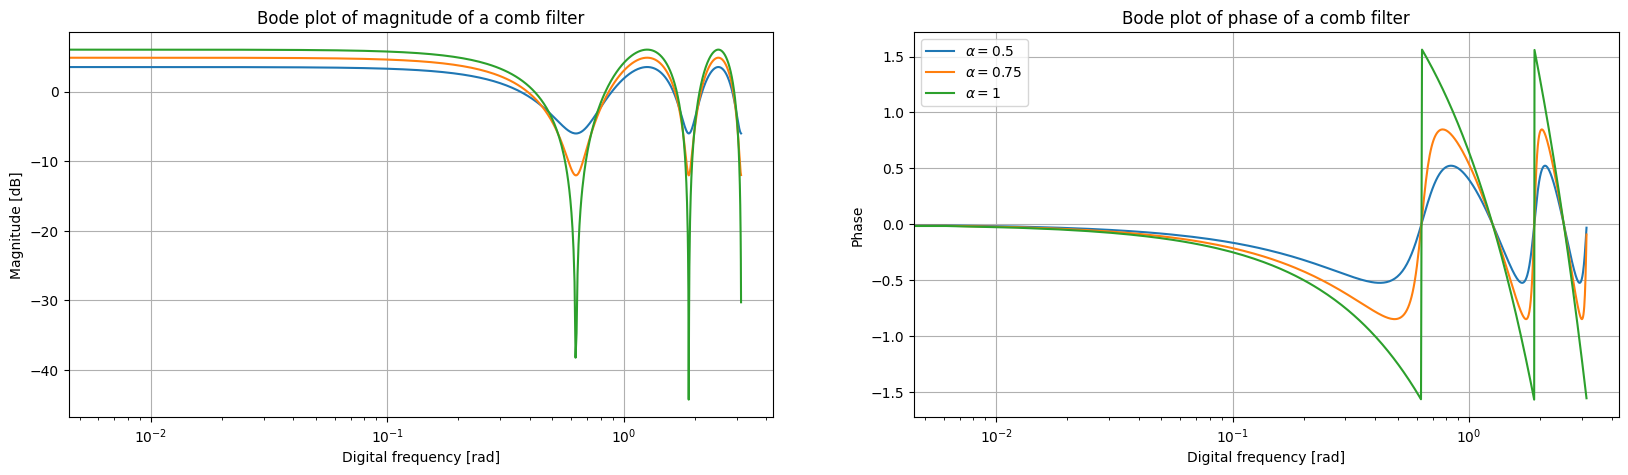

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))
alphas = np.array([0.5, 0.75, 1])

a = np.insert(np.array(np.zeros(N)), 0, 1) # a = [1 0 ... 0]

for alpha in alphas:
  b = np.append(np.insert(np.array(np.zeros(N-1)), 0, 1),alpha) # b = [1 0 ... 0 alpha]
  w, H = signal.freqz(b, a)

  ax1.semilogx(w, 20*np.log10(np.abs(H)))
  ax2.semilogx(w, np.unwrap(np.angle(H)))


ax1.set_xlabel('Digital frequency [rad]')
ax1.set_ylabel('Magnitude [dB]')
ax1.set_title('Bode plot of magnitude of a comb filter')
ax1.grid()


ax2.set_xlabel('Digital frequency [rad]')
ax2.set_ylabel('Phase')
ax2.set_title('Bode plot of phase of a comb filter')
ax2.grid()

plt.legend([r'$\alpha=0.5$',r'$\alpha=0.75$',r'$\alpha=1$'])
plt.show()

## IIR filters

The digital Infinite Impulse Response filters are firstly desgined in their analog counterpart. In this way, we find the following topologies:

*   Bessel
*   Butterworth
*   Chebyshev type I and type II
*   Elliptic (or Cauer)


All of these topologies related functions return the numerator and denominator of the transfer function in the Laplace domain $H(s)$. However, they need the following input arguments:

*   Order of filter
*   Cut-off frequency(ies)
*   Type of filter, i.e. lowpass, highpass, bandpass or bandstop
*   Bandpass ripple  in dB (applies only for Chebyshev I and elliptic topologies)
*   Bandstop ripple  in dB (applies only for Chebyshev II and elliptic topologies)

The syntax for each topology is given as follows:



```
# Butterworth topology
num, den = signal.butter(N, Wn, btype, analog=False, fs)

# Chebyshev I topology
num, den = signal.cheby1(N, rp, Wn, btype, analog=False, fs)

# Chebyshev II topology
num, den = signal.cheby2(N, rs, Wn, btype, analog=False, fs)

# Elliptic topology
num, den = signal.ellip(N, rp, rs, Wn, btype, analog=False, fs)
```

In these topologies:



*   N: int - the order of the filter
*   rp: float - maximum ripple below unit gain in the passband, given in decibels
*   rs: float - minimum attenuation required in the stopband, given in decibels
*   Wn: array - cutoff frequency. A scalar (for lowpass and highpass) or length-2 sequence (for bandpass or bandstop). If $F_s$ is not specified in the last argument, it should be normalized from 0 to 1 (just divide the frequency in Hz by $F_s/2$). Otherwise, if $F_s$ is specified, you must enter the frequency in Hz.
*   btype: string - ‘lowpass’ (by default), ‘highpass’, ‘bandpass’, or ‘bandstop’
*   fs: float - sampling rate

Note that the argument ```analog``` is set to ```False```. If ```True```, an analog filter described in the Laplace domain $H(s)$ is returned.


---



---



The order can be set manually or automatically by using optimization methods, that make use of the following functions:

```
# Butterworth topology
N, _ = signal.buttord(wp, ws, gpass, gstop, analog=False, fs)

# Chebyshev I topology
N, _ = signal.cheb1ord(wp, ws, gpass, gstop, analog=False, fs)

# Chebyshev II topology
N, _ = signal.cheb2ord(wp, ws, gpass, gstop, analog=False, fs)

# Elliptic topology
N, _ = signal.ellipord(wp, ws, gpass, gstop, analog=False, fs)
```

To use these functions, you must to know:

*   wp: float - normalized passband (cutoff) frequency
*   ws: float - normalized stopband frequency
*   gpass: float - maximum loss in the passband given in decibels
*   gstop: float - minimum attenuation in the stopband given in decibels


***Example - effect of the topology***


Design a 5th-order lowpass filter with a cutoff frequency of 2 GHz. Compute the frequency response of the filter for topologies Butterworth, Chebyshev I (3 dB bandpass ripple), Chebyshev II (30 dB stopband ripple), and elliptic (3 and 30 dB). Plot the frequency response of the designed filters.

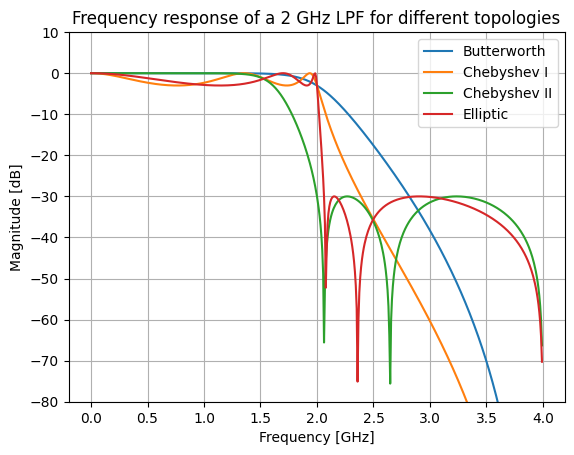

In [16]:
N = 5          # Order
Wn = 2e9       # Cutoff frequency in Hz
rp = 3         # Bandpass ripple
rs = 30        # Stopband ripple
btype = 'lowpass'

Fs = 4*Wn      # We define the sampling rate according to the bandwidth

b, a = signal.butter(N, Wn, btype, analog=False, fs=Fs)
w, H1 = signal.freqz(b, a)

b, a = signal.cheby1(N, rp, Wn, btype, analog=False, fs=Fs)
_, H2 = signal.freqz(b, a)  # Digital frequency was returned previously, thus it doesn't care

b, a = signal.cheby2(N, rs, Wn, btype, analog=False, fs=Fs)
_, H3 = signal.freqz(b, a)

b, a = signal.ellip(N, rp, rs, Wn, btype, analog=False, fs=Fs)
_, H4 = signal.freqz(b, a)

f = w*Fs/(2*np.pi) # Create a linear frequency vector
f = f/1e9;         # But is better to plot in GHz instead of Hz

plt.plot(f,20*np.log10(np.abs(H1)))
plt.plot(f,20*np.log10(np.abs(H2)))
plt.plot(f,20*np.log10(np.abs(H3)))
plt.plot(f,20*np.log10(np.abs(H4)))

plt.xlabel('Frequency [GHz]')
plt.ylabel('Magnitude [dB]')
plt.title('Frequency response of a 2 GHz LPF for different topologies')
plt.legend(['Butterworth','Chebyshev I','Chebyshev II','Elliptic'])
plt.ylim([-80, 10])
plt.grid()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()


***Example - Effect of the order***


Explore the effect of the order on the Butterworth topology, for a lowpass filter with cutoff frequency of 2 GHz and order 5, 15, 30, and 50.

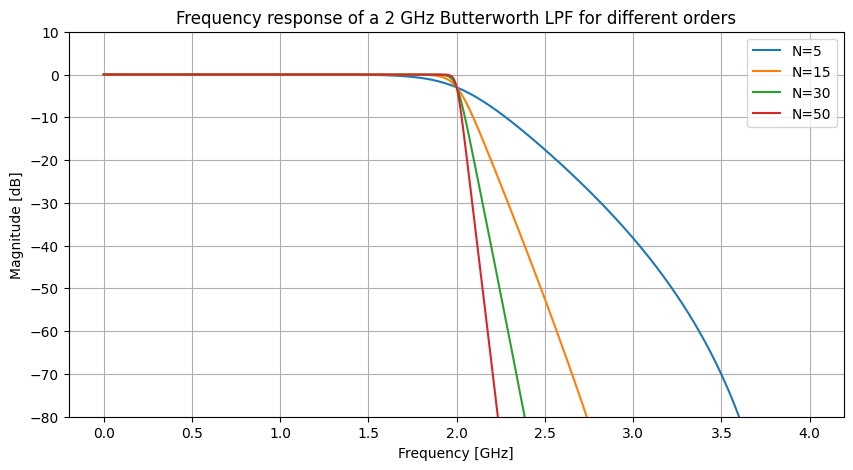

In [17]:
orders = [5, 15, 30, 50]
Wn = 2e9                  # Cutoff frequency in Hz
btype = 'lowpass'

Fs = 4*Wn      # We define the sampling rate according to the bandwidth

for N in orders:
  b, a = signal.butter(N, Wn, btype, analog=False, fs=Fs)
  w, H = signal.freqz(b, a)

  plt.plot(w*Fs/(2*np.pi)/1e9,20*np.log10(np.abs(H))) # Frequency was converted to linear, and expressed in GHz


plt.xlabel('Frequency [GHz]')
plt.ylabel('Magnitude [dB]')
plt.title('Frequency response of a 2 GHz Butterworth LPF for different orders')
plt.legend(['N=5','N=15','N=30','N=50'])
plt.ylim([-80, 10])
plt.grid()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()


***Example - Elliptic BPF***


Design a bandpass elliptic filter with the following profile: cutoff frequencies between 4 and 7 kHz, with stopband frequencies at 3 and 8 kHz, bandpass ripple of 1 dB and stopband ripple of 40 dB.


---

Note that the filter's order is not provided, so we must to find it.


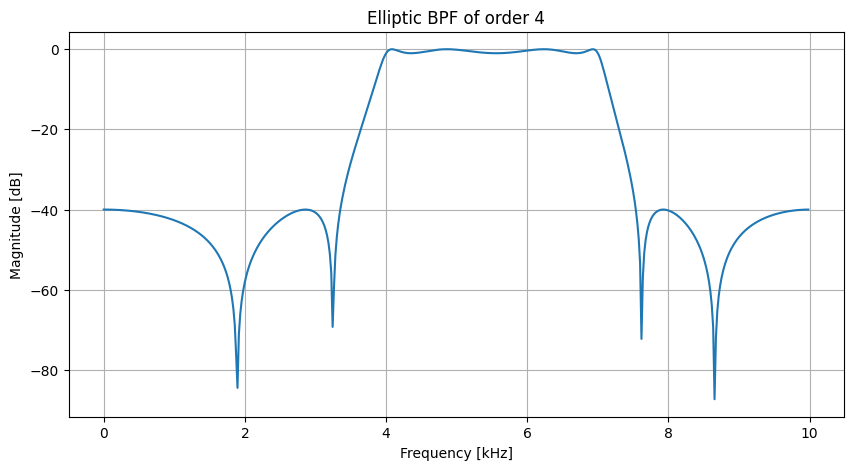

In [18]:
Wn = [4e3, 7e3]               # Cutoff frequencies in Hz
Ws = [3e3, 8e3]               # Bandstop frequencies in Hz
Rp = 1
Rs = 40
btype = 'bandpass'

Fs = 20e3      # We define the sampling rate according to the Nyquist theorem

N, _ = signal.ellipord(wp=Wn, ws=Ws, gpass=Rp, gstop=Rs, analog=False, fs=Fs)

b, a = signal.ellip(N, Rp, Rs, Wn, btype, analog=False, fs=Fs)
w, H = signal.freqz(b, a)

f = w*Fs/(2*np.pi)  # Linear frequency
f = f/1e3           # in kHz
plt.plot(f,20*np.log10(np.abs(H)))


plt.xlabel('Frequency [kHz]')
plt.ylabel('Magnitude [dB]')
plt.title('Elliptic BPF of order '+str(N))
plt.grid()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

***Example with a cosine signal***


Filter out the highest frequency components of the signal:

$x(t)=5\cos(6\pi t)+\cos(200\pi t)+1.5\cos(40\pi t)$

Plot the original and the filtered signals in the range 0 - 1 s. Assume a sampling rate of 1 kHz.



---

Note that $x(t)$ has three harmonics: 3, 20, and 100 Hz. So, we want to conserve the lowest harmonic, that is 3 Hz. In this way, we must to apply a lowpass filter with a cutoff frequency higher than 3 Hz but lower than 20 Hz, for instance 10 Hz. Also, since the problem does not ask for a specific topology, we can feel free to use any of the learned, e.g. Butterworth.

First, let define the filter:


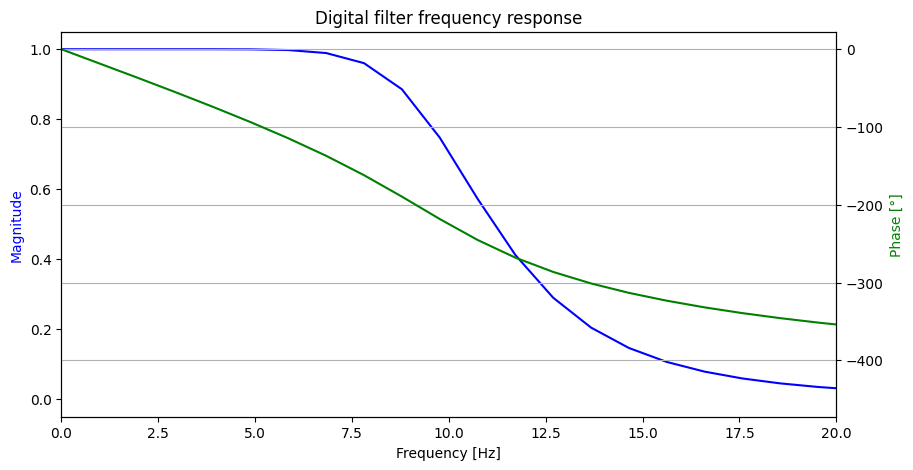

In [19]:
N = 5   # Feel free to change this number
Wn = 10  # Cutoff frequency in Hz
btype = 'lowpass'

Fs = 1e3
T = 1/Fs  # Sampling period

b, a = signal.butter(N, Wn, btype, analog=False, fs=Fs)
w, H = signal.freqz(b, a)

f = w*Fs/(2*np.pi)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(f,np.abs(H),'b') # Blue color line
ax1.set_ylabel('Magnitude', color='b')
ax1.set_xlabel('Frequency [Hz]')

ax2 = ax1.twinx()


angles = np.unwrap(np.angle(H))
ax2.plot(f, angles*180/np.pi, 'g') # Phase converted to degrees, and green color line
ax2.set_ylabel('Phase [°]', color='g')
ax2.grid()
ax2.set_xlim((0, 20))
ax2.axis('tight')

plt.xlim((0,20))
plt.show()

And now, let's filter the signal!

Text(0, 0.5, 'Amplitude')

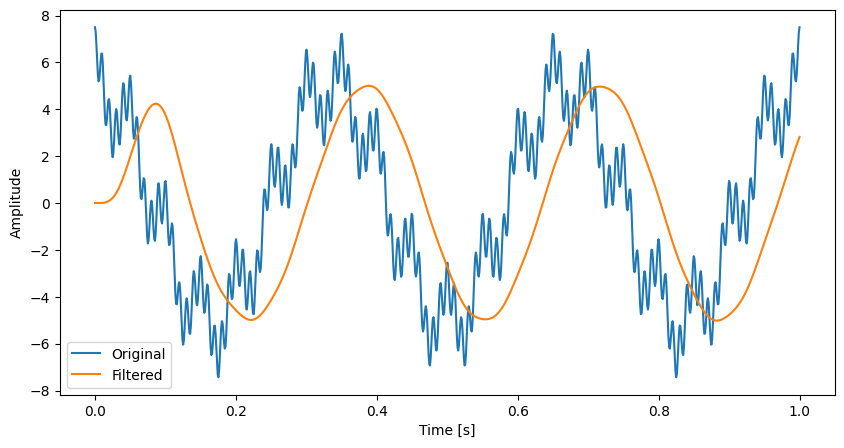

In [20]:
t = np.linspace(0,1,int(1/T))  # From 0 to 1, with 1/T samples
x = 5*np.cos(6*np.pi*t)+np.cos(200*np.pi*t)+1.5*np.cos(40*np.pi*t)

y = signal.lfilter(b,a,x);

plt.plot(t,x)
plt.plot(t,y)
plt.legend(['Original','Filtered'])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

And now, compute the spectra of both signals:

(0.0, 110.0)

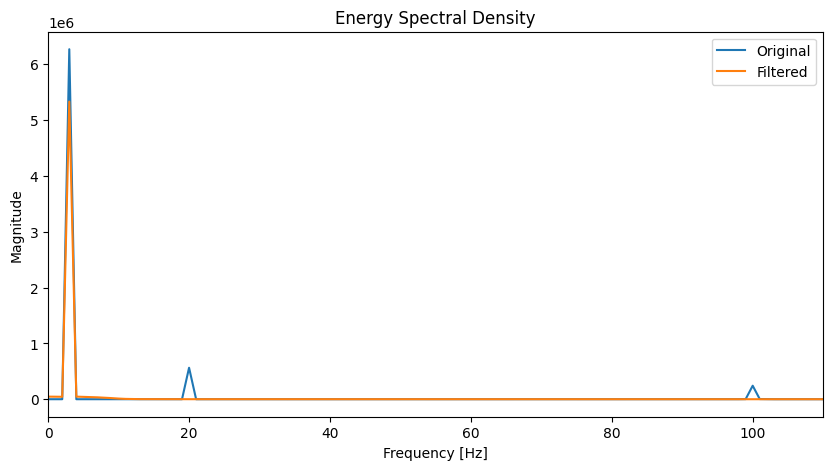

In [ ]:
N = len(x) # Signal's length

X = np.fft.fft(x)
Y = np.fft.fft(y)


k = np.arange(N)    # Frequency counter
f = k*Fs/N          # Frequency conversion

middle_index = N//2     # Floor division rounds down

plt.plot(f[:middle_index] ,np.abs(X[:middle_index])**2)
plt.plot(f[:middle_index] ,np.abs(Y[:middle_index])**2)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Energy Spectral Density')
plt.legend(['Original','Filtered'])
plt.xlim([0, 110])

##FIR filters

The Finite Impulse Response filters are a particular topology of digital filters in which some particular features are present. The most evident is that they have not autoregressive components:

$y[n]=∑_{i=0}^{M-1}b_ix[n-i]$

The following consequences are produced:
*   The impulse response is equal to the filter coefficients, that is $h[n]=[b_0 \, b_1 \,\cdots \,b_{M-1}]$. In other words, $h[n]$ has $M$ data, i.e. it is finite (well, hence the name of the filter!)
*   The transfer function $H(z)$ has not poles $→$ they are always stable!

Another important feature is that FIR filters have linear phase, that leads to:


*   They don't change the shape of the signal
*   The filter's coefficients are symmetric, that is $h[i]=h[M-1-i]$. Also, anti-symmetric filters can be computed, in which $h[i]=-h[M-1-i]$

And last but not least, FIR filters allow arbitraries frequency responses, i.e. they are not limited to LPF, HPF, BPF or SBF.



***Example with a cosine signal***

Repeat the previous exercise (LPF with cut-off frequency of 10 Hz) using a FIR filter.

Text(0.5, 1.0, 'Impulse response = filter coefficients')

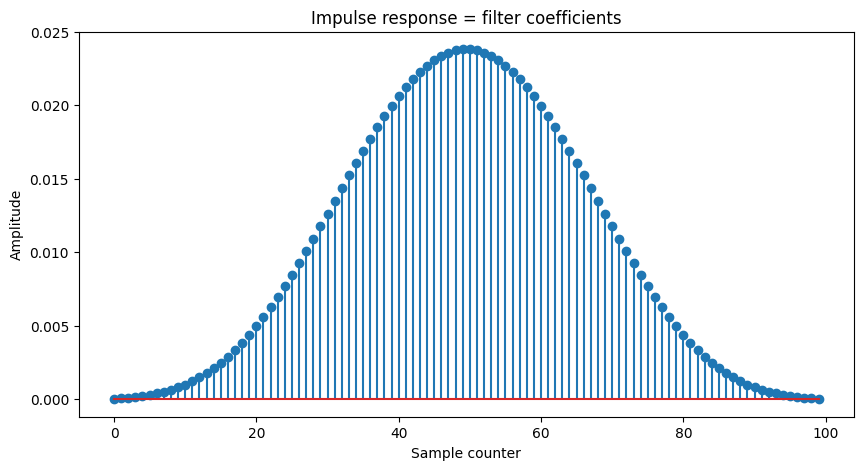

In [ ]:
M = 100     # Order. These orders must be higher than with IIR fiters
h = signal.firwin(numtaps=M, cutoff=10, fs=Fs)

n = np.arange(M)

plt.stem(n,h)
plt.xlabel('Sample counter')
plt.ylabel('Amplitude')
plt.title('Impulse response = filter coefficients')


Note that:

1.   $h[n]$ has finite samples
2.   $h[n]$ is symmetric



Now, let's compute the frequency response:

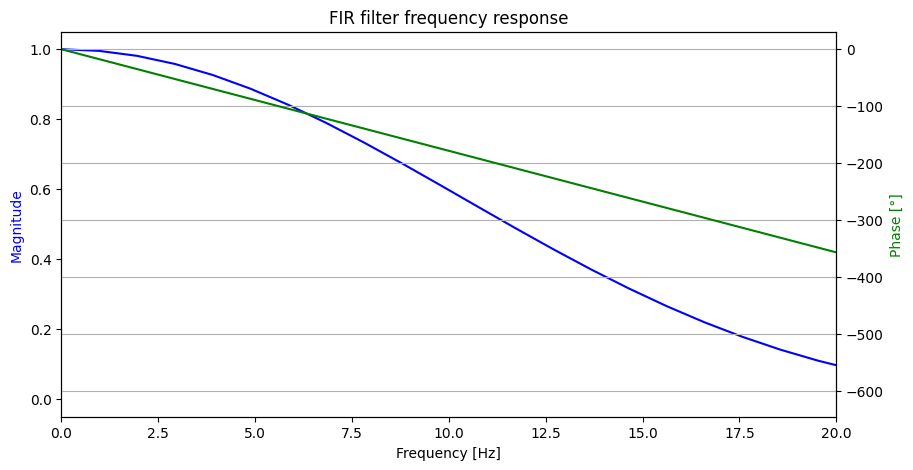

In [ ]:
w, H = signal.freqz(h, 1)   # We have not denominator

f = w*Fs/(2*np.pi)

fig, ax1 = plt.subplots()
ax1.set_title('FIR filter frequency response')
ax1.plot(f,np.abs(H),'b') # Blue color line
ax1.set_ylabel('Magnitude', color='b')
ax1.set_xlabel('Frequency [Hz]')

ax2 = ax1.twinx()


angles = np.unwrap(np.angle(H))
ax2.plot(f, angles*180/np.pi, 'g') # Phase converted to degrees, and green color line
ax2.set_ylabel('Phase [°]', color='g')
ax2.grid()
ax2.axis('tight')

plt.xlim((0,20))
plt.show()

Note the **linear phase**.

Text(0, 0.5, 'Amplitude')

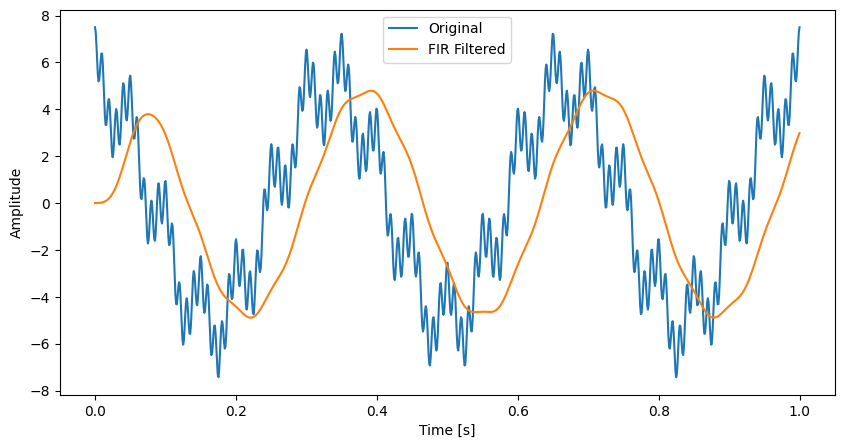

In [ ]:
y = signal.lfilter(h,1,x);

plt.plot(t,x)
plt.plot(t,y)
plt.legend(['Original','FIR Filtered'])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

Even though the signal was filtered, results are not good as in the IIR case. What if we increase the order?

Text(0, 0.5, 'Amplitude')

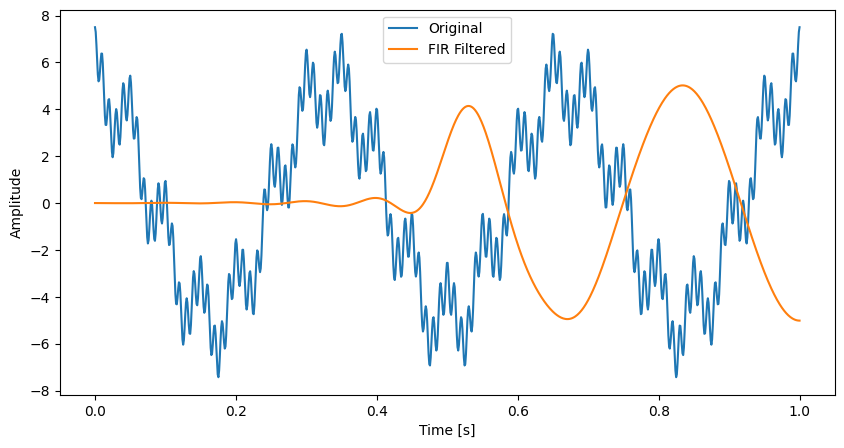

In [ ]:
h = signal.firwin(numtaps=1000, cutoff=10, fs=Fs)  # Hamming window by default
y = signal.lfilter(h,1,x);

plt.plot(t,x)
plt.plot(t,y)
plt.legend(['Original','FIR Filtered'])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

What happened here? Well, recall that the first sample of the FIR filter output is retrieved after computation of the multiplication of the $M$ filter coefficients by the first $M$ data of the input, i.e.:


$y[0]=∑_{i=0}^{M-1}b_ix[-i]=b_0x[0]+b_1x[-1]+\cdots +b_{M-1}x[-M+1]$

Since we have not input samples at negative counters, the first output will be zero (or close). In this way, $y[0]=b_0x[0]$

The second sample will be:

$y[1]=∑_{i=0}^{M-1}b_ix[1-i]=b_0x[1]+b_1x[0]+\cdots +b_{M-1}x[-M]=b_0x[1]+b_1x[0]$


Just after the first $M$ samples, the output will show this *final* behaviour, that is, it will depend absolutely on samples at $n\geq 0$.

For the current example, we are plotting 1000 samples (1 s, and $F_s=1$ kHz), which is equal to the filter's order. So, in order to observe how well the filter acts, we must plot at least 1000 more samples:

Text(0, 0.5, 'Amplitude')

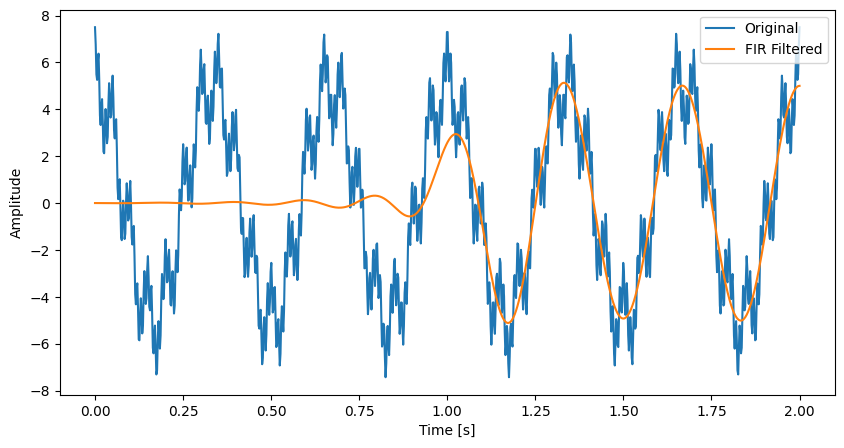

In [ ]:
t = np.linspace(0,2,int(1/T))  # From 0 to 2, with 1/T samples
x = 5*np.cos(6*np.pi*t)+np.cos(200*np.pi*t)+1.5*np.cos(40*np.pi*t)

y = signal.lfilter(h,1,x); # We are using the filter designed in the previous box-code

plt.plot(t,x)
plt.plot(t,y)
plt.legend(['Original','FIR Filtered'])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

This is a great result, since the output is less shifted in comparison with the obtained the IIR filter, a consequence of the linear phase. However, the first stage (transient) should be discarded for analysis.

***Example with and audio***

Load a song and attenuate the following frequency bands:


*   200-1500 Hz
*   2000-2500 Hz

Use the Hann window.


In [21]:
from IPython.display import Audio, display
from scipy.io.wavfile import read
from google.colab import files

# To upload an audio file
uploaded = files.upload()

# Write the audio file name
file_audio = "prueba.wav"

Fs, x = read(file_audio)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
Audio(file_audio)

In [ ]:
# switch audio to mono

if len(x.shape)==2:
  # if audio is stereo
  channel1 = x[:,0]
  channel2 = x[:,1]
  x = (channel1+channel2)/2

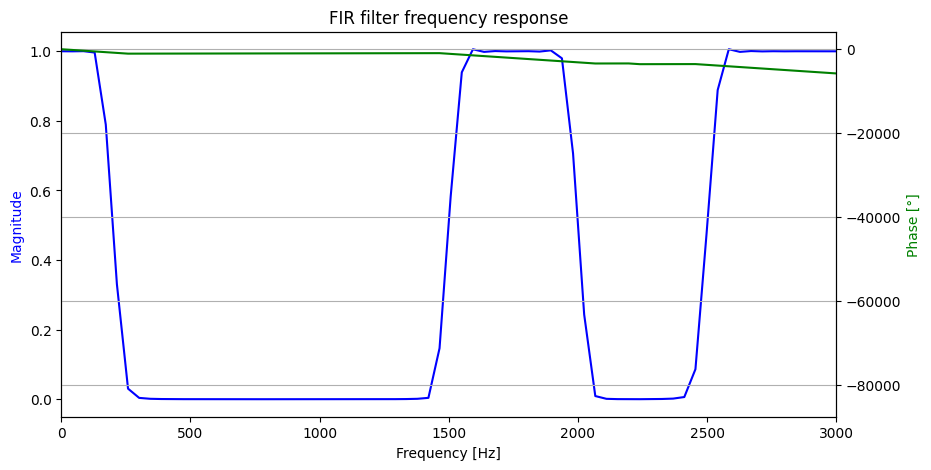

In [ ]:
f1 = 200
f2 = 1500
f3 = 2000
f4 = 2500

# Multi-band (passbands are [0, f1], [f2, f3] and [f4, Fs/2])
h = signal.firwin(1001, [f1, f2, f3, f4], window='hann', fs=Fs)

w, H = signal.freqz(h, 1)   # We have not denominator

f = w*Fs/(2*np.pi)

fig, ax1 = plt.subplots()
ax1.set_title('FIR filter frequency response')
ax1.plot(f,np.abs(H),'b') # Blue color line
ax1.set_ylabel('Magnitude', color='b')
ax1.set_xlabel('Frequency [Hz]')

ax2 = ax1.twinx()


angles = np.unwrap(np.angle(H))
ax2.plot(f, angles*180/np.pi, 'g') # Phase converted to degrees, and green color line
ax2.set_ylabel('Phase [°]', color='g')
ax2.grid()
ax2.axis('tight')

plt.xlim((0,3000))
plt.show()


(0.0, 3000.0)

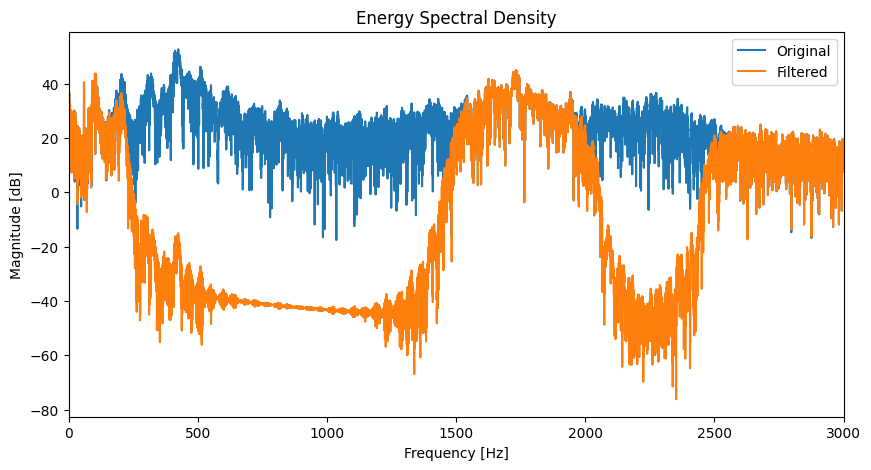

In [ ]:
y = signal.lfilter(h,1,x)


N = len(x) # Signal's length

X = np.fft.fft(x)
Y = np.fft.fft(y)


k = np.arange(N)    # Frequency counter
f = k*Fs/N          # Frequency conversion

middle_index = N//2     # Floor division rounds down

plt.plot(f[:middle_index] ,10*np.log10(np.abs(X[:middle_index])**2))
plt.plot(f[:middle_index] ,10*np.log10(np.abs(Y[:middle_index])**2))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.title('Energy Spectral Density')
plt.legend(['Original','Filtered'])
plt.xlim([0, 3000])

Note the attenuation bands on the audio. Now, we can listen the filtered audio:

In [ ]:
Audio(y, rate = Fs)

##Adaptive filters

FIR filters are the most suitable for adaptive approaches



In [ ]:
def adaptive_filter_LMS(x, d, mu, M, max_iter):
    N = len(x)  # Number of samples
    h = np.zeros(M)  # Initialize filter coefficients
    y = np.zeros(N)  # Initialize output signal
    e = np.zeros(N)  # Initialize error

    for n in range(max_iter):
        for i in range(M, N):
            # Input signal to the filter
            x_input = x[i-M:i]

            # Compute the output signal
            y[i] = np.dot(h, x_input)

            # Compute the error
            e[i] = d[i] - y[i]

            # Update filter coefficients using the LMS algorithm
            h = h + 2 * mu * e[i] * x_input

    return y, e, h

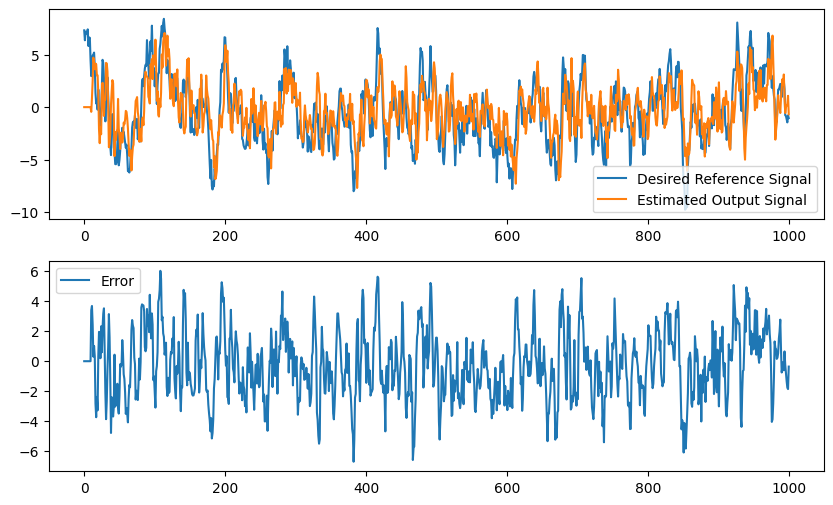

In [ ]:
np.random.seed(0)
N = 1000
M = 10  # Filter length
mu = 0.01  # Convergence rate
max_iter = N - M

# Input signal (you can use your own data)
x = np.random.randn(N)

# Desired reference signal (you can use your own data)
d = np.convolve(x, np.ones(M), mode='same') + 0.1 * np.random.randn(N)

estimated_output, error, filter_coefficients = adaptive_filter_LMS(x, d, mu, M, max_iter)

# Visualization of the desired reference signal and the estimated output signal

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(d, label='Desired Reference Signal')
plt.plot(estimated_output, label='Estimated Output Signal')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(error, label='Error')
plt.legend()
plt.show()
